<a href="https://colab.research.google.com/github/msremigio/projects_DataScience/blob/master/Breast_Cancer_Diagnose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Helping to Diagnose Breast Cancer
>> Using a real dataset from the University of Wisconsin

---

Cancer is a consequence of mutations, or abnormal changes in the genes responsible for regulating the growth of cells and keeping them healthy. When these undesired mutations happen, cells begin to divide without control and order, producing more and more irregular cells forming a tumor.

[Being the deadliest type of cancer between women](https://https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6468737/), the breast cancer is an uncontrolled growth of breast cells. Statiscally, [about 1 in 8 U.S. women (about 12%) will develop invasive breast cancer over the course of her lifetime](https://www.breastcancer.org/symptoms/understand_bc/statistics). When we bring this statistic to Brazil, [1 in every 12 women will develop a breast cancer before 90 years old](https://noticias.r7.com/saude/uma-em-cada-12-mulheres-recebera-diagnostico-de-cancer-de-mama-02102019).

![<a href="https://www.freepik.com/free-photos-vectors/logo">Logo vector created by freepik - www.freepik.com</a>](https://github.com/msremigio/projects_DataScience/blob/master/images/breast_cancer.jpg?raw=true)

<a href="http://www.freepik.com">Designed by Freepik</a>

It's a known matter that the earlier the diagnosis is made, greater are the chances of a successful treatment. This fact has helped to encourage the emergence of global campaigns aimed at informing and raising awareness to the importance of cheking on the breast health at least once a year through a mammogram or other testing. This campaign happens annually in October and it's known as the [Breast Cancer Awareness Month](https://www.nationalbreastcancer.org/breast-cancer-awareness-month).

Motivated by a recent breast cancer occurrence in my family and some other close by cases throughout my life together with the increasing usage of Machine Learning (ML) techniques that are helping in the prognosis and diagnosis of type of cancer, I consider that showing how ML can be used to predict and speed up a new breast cancer episode is a way of bringin awareness and contributes with such important campaigns.

> **In summary, this project consists in the creation of a ML model to classify wheter a breast tumor is malignant or benign, using a real dataset provided by the University of Wisconsin.**

# 1. Importing the Data

The dataset was made available by reaserchers of the University of Wisconsin and it can be found at the [Machine Learning Repository of the University of California, Irvine](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

The dataset consists of 569 rows (entries)and 32 columns (variables). Features were computed from digitized images of fine needle aspirate (FNA) of a breast mass. The features basically describe characteristics of the cell nuclei that could be extracted from the images. The target variable ("diagnosis") can be classified as either malignant or benign.

First things first, let's import to our project the necessary libraries that are going to be used throughout the project and then import the dataset into a DataFrame (DF) structure.





In [0]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style()

df = pd.read_csv('https://raw.githubusercontent.com/msremigio/projects_DataScience/master/datasets/breast_cancer/breast_cancer.data')


**How many entries (rows) and how many variables (columns) the DF have?**


In [174]:
print(f'{"DataFrame Dimensions":-^50}\n')
print(f'Entries:\t{df.shape[0]}\nVariables:\t{df.shape[1]}')

---------------DataFrame Dimensions---------------

Entries:	569
Variables:	32


# 2. Exploring the Data

First of all, this dataset description can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

To start with the data exploration analysis it is important to understand what each atribute in this dataset represents. 

# Data Dictionary

* **ID:** An identification number for each image analyzed
* **Diagnosis:** The target variable. Representing the diagnosis result for a breast tumor
  * M = Malignant
  * B = Benign

*Ten real-valued features are computed for each cell nucleus:*

* **Radius:** Mean of distances from center to points on the perimeter
* **Texture:** Standard deviation of gray-scale values
* **Perimeter:** Cell nucleus perimeter
* **Area:** Cell nucleus area
* **Smoothness:** Local variation in radius lengths
* **Compactness:** 
  * Perimeter^2 / (Area - 1.0)
* **Concavity:** Severity of concave portions of the contour
* **Concave Points:** Number of concave portions of the contour
* **Symmetry:** Cell nucleus symmetry
* **Fractal Dimension:**
  * Coastline approximation - 1

*The mean, standard error (se), and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.*

After understanding the what each variable represents, we can see how they are organized in the data file, what are the variable types and check for some basic statistics for the data distribution.


In [175]:
# Displaying the first 10 entries of the DF
df.head(10)


,ID,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,Symmetry_mean,Fractal_dimension_mean,Radius_se,Texture_se,Perimeter_se,Area_se,Smoothness_se,Compactness_se,Concavity_se,Concave_points_se,Symmetry_se,Fractal_dimension_se,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


Looking at the first 10 entries, it is obvious that only the target variable is **categorical**. Besides, we can notice that some variables diverge considerably in orders of magnitude (from 10^3 to 10^-2).   

In [176]:
# Name and type of each variable in the DataFrame
print(f'{"Features and its Types":-^50}\n')
df.dtypes

--------------Features and its Types--------------



ID                           int64
Diagnosis                   object
Radius_mean                float64
Texture_mean               float64
Perimeter_mean             float64
Area_mean                  float64
Smoothness_mean            float64
Compactness_mean           float64
Concavity_mean             float64
Concave_points_mean        float64
Symmetry_mean              float64
Fractal_dimension_mean     float64
Radius_se                  float64
Texture_se                 float64
Perimeter_se               float64
Area_se                    float64
Smoothness_se              float64
Compactness_se             float64
Concavity_se               float64
Concave_points_se          float64
Symmetry_se                float64
Fractal_dimension_se       float64
Radius_worst               float64
Texture_worst              float64
Perimeter_worst            float64
Area_worst                 float64
Smoothness_worst           float64
Compactness_worst          float64
Concavity_worst     

Observing the code output above, the **ID** variable **numerical** and **discrete**. The **Diagnosis** variable is **Categorical** and **nominal** and the other 30 features are **numerical** and **continuous**.

In [177]:
# Statistical summary of the numerical variables
print(f'{" Numerical Variables Statistics ":-^100}\n')
display(df.describe())

# Statistical summary of the categorical variables
print(f'{" Categorical Variables Statistics ":-^100}\n')
display(df.describe(include=['O']))

---------------------------------- Numerical Variables Statistics ----------------------------------



,ID,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,Symmetry_mean,Fractal_dimension_mean,Radius_se,Texture_se,Perimeter_se,Area_se,Smoothness_se,Compactness_se,Concavity_se,Concave_points_se,Symmetry_se,Fractal_dimension_se,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


--------------------------------- Categorical Variables Statistics ---------------------------------



,Diagnosis
count,569
unique,2
top,B
freq,357


Through the **describe()** method statistics, we can make an assumption that no missing values exist in the dataset, and apparently there are no outliers too.

Refering to the target variable, we can notice that only malignant (M) and benign (B) values exist in the dataset, and the last one is more frequent, happening 357 out of 569 samples. Given that, we can also confirm that we are dealing with a classification and supervised learning problem.

Continuing, we can assure that our previous assumptions are correct through the **isnull()** method, and then check for how many unique values there are for each atribute (with **nunique()** method).

In [178]:
# Checking for missing values
print(f'{"Missing Values":-^50}\n')
df.isnull().sum()

------------------Missing Values------------------



ID                         0
Diagnosis                  0
Radius_mean                0
Texture_mean               0
Perimeter_mean             0
Area_mean                  0
Smoothness_mean            0
Compactness_mean           0
Concavity_mean             0
Concave_points_mean        0
Symmetry_mean              0
Fractal_dimension_mean     0
Radius_se                  0
Texture_se                 0
Perimeter_se               0
Area_se                    0
Smoothness_se              0
Compactness_se             0
Concavity_se               0
Concave_points_se          0
Symmetry_se                0
Fractal_dimension_se       0
Radius_worst               0
Texture_worst              0
Perimeter_worst            0
Area_worst                 0
Smoothness_worst           0
Compactness_worst          0
Concavity_worst            0
Concave_points_worst       0
Symmetry_worst             0
Fractal_dimension_worst    0
dtype: int64

In [179]:
# How many unique values per atribute
print(f'{"Unique Values":-^50}\n')
df.nunique().sort_values(ascending = True) 

------------------Unique Values-------------------



Diagnosis                    2
Smoothness_worst           411
Symmetry_mean              432
Radius_mean                456
Radius_worst               457
Smoothness_mean            474
Texture_mean               479
Concave_points_worst       492
Symmetry_se                498
Fractal_dimension_mean     499
Symmetry_worst             500
Concave_points_se          507
Texture_worst              511
Perimeter_worst            514
Texture_se                 519
Perimeter_mean             522
Area_se                    528
Compactness_worst          529
Perimeter_se               533
Concavity_se               533
Fractal_dimension_worst    535
Concavity_mean             537
Compactness_mean           537
Concavity_worst            539
Area_mean                  539
Radius_se                  540
Compactness_se             541
Concave_points_mean        542
Area_worst                 544
Fractal_dimension_se       545
Smoothness_se              547
ID                         569
dtype: i

In this dataset scenario there's only two possible outcomes for the target variable (Diagnosis), but in other circunstances it might be helpful to go for a graphical visualization on how a variable is distributed. So now I will use a bar plot to visualize the Diagnosis distribution and after I will plot the histograms for all the numerical variables available in the DF, as a strategy to observe a possible statistical distribution of a given variable. 

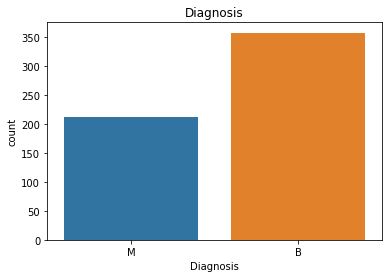


Outcomes percentages:

B    62.741652
M    37.258348
Name: Diagnosis, dtype: float64


In [180]:
# Bar plot for the Diagnosis variable
fig, ax = plt.subplots()
sns.countplot('Diagnosis', data=df, ax=ax)
ax.set_title("Diagnosis")
plt.show()

# Percentage of each diagnosis outcome
print('\nOutcomes percentages:\n')
print(df.Diagnosis.value_counts() / df.shape[0] * 100)


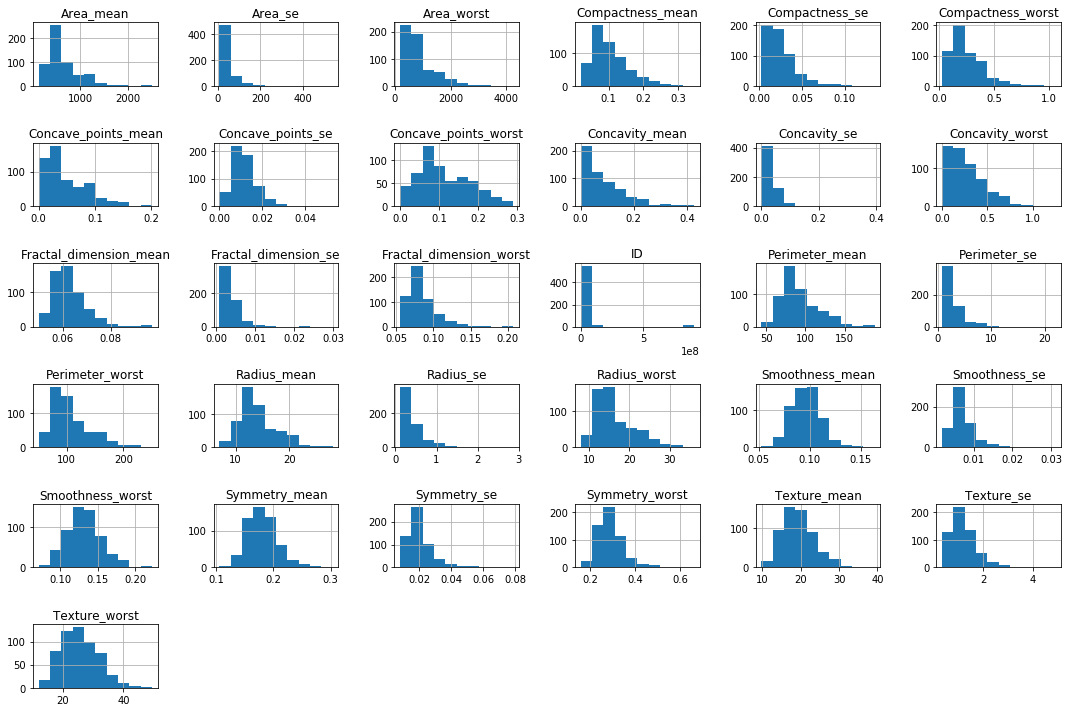

In [181]:
df.hist(figsize=(15, 10))
plt.tight_layout();

Pay close attention on how some variables as well distributed around a mean value (having some similarity with a normal distribution). On the other hand, some features are centered to lower values (left side), representing greater values of standard deviation.

As an alternative to visualize how each variable is correlated with each other, an interesting approach is to plot a **heatmap** of numerical variables, assigning colors and with different intensities to identify positive correlations (red) and negative correlations (blue).



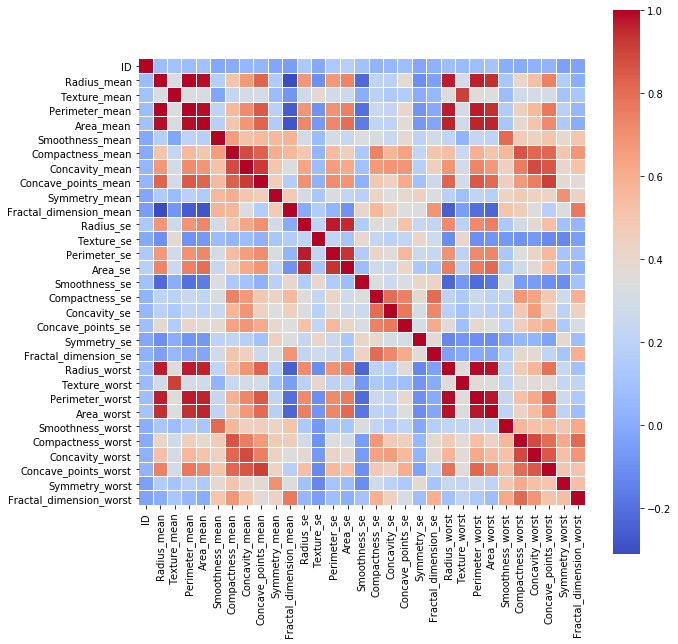

In [182]:
# Plotting a heatmap for numerical variables
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(method='pearson'), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=False);

At this point, it's obvious how the variable **ID** doesn't add any valuable information to our analysis, so we can remove it from the DF when the pre-processing step comes.

Lastly, notice how many variables have high values of positive correlation between each other. Some of then are quite intuitive (radius, perimeter and area have a direct relation mathematically, for example), but others aren't at all, so it's really important to use these graphical aids to help us to see these relatioships.

# 3. Data Pre-processing

All the study made so far will be favorable to prepare the dataset for further training our Machine Learning model. The steps that will be considered at next, for a preliminary model result, are: 

* Evaluate which features have no importance to the model performance and remove then from our dataset

* Separate our **target** variable (Diagnosis) from our **independent** variables;

* Since all independent variables are numerical and continuous, let's weigh the necessity of using **standardization** in the data *(comparing results with our trained model)*;

* Check if it is necessary to encode  (transform from categorical to numerical) the **target** variable *(comparing results with our trained model)*;

* At last, separate the DataFrame between train and test portions.



In [197]:
# Remove non-important features
x = df.copy()
x.drop('ID', axis=1, inplace=True)
x.head(1)

,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,Symmetry_mean,Fractal_dimension_mean,Radius_se,Texture_se,Perimeter_se,Area_se,Smoothness_se,Compactness_se,Concavity_se,Concave_points_se,Symmetry_se,Fractal_dimension_se,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


First we notice that the **ID** feature has no importance to our model predictions, it's only an identification number of a previous image and doesn't influence the classification between a malignant and benign tumor. The remaining variables seem to share their correlatino between each other.

Now, let's separate the **Diagnosis** variable (target) from the rest.

In [198]:
# Separating the target from the independent variables
y = x.Diagnosis.copy()
x.drop('Diagnosis', axis=1, inplace=True)
print(f'x = {x.shape}')
print(f'y = {y.shape}')

x = (569, 30)
y = (569,)


For now, we will use a **standardization** technique from **sklearn.preprocessing** library called **StandardScaler**, and later, with our ML model defined we will check if this procedure results in a performance improvement for our model.

In [201]:
# Standardizing the independent variables
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
x[0,:]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

Next, we will use an **encoding** library, also from **sklearn.preprocessing**, called **LabelEncoder** to convert the **Diagnosis** variable from categorical to numerical. Later, with our ML model defined we will check if this step is really necessary to our training algorithm.

In [202]:
# Enconding the target variable
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
print(y[0:20])
print('\nM =\t1\nB =\t0')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]

M =	1
B =	0


Lastly, let's divide the **x** and **y** datasets  randomly into the **train** and **test** parts. For that I'm using the **train_test_split** from the **sklearn.model_selection** library.

In [203]:
# Obtaining the train and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state=0)
print(f'x_train = {x_train[0:1]}\n')
print(f'x_test = {x_test[0:1]}\n')
print(f'y_train = {y_train[0:5]}\n')
print(f'y_test = {y_test[0:5]}')

x_train = [[-0.74902829 -1.09363975 -0.74055999 -0.71099466  0.58638323 -0.41808829
  -0.44845498 -0.75393607 -0.11908877  0.41711442 -0.72823773 -0.09226561
  -0.64307408 -0.57198019 -0.6946878  -0.24245658  0.32050519 -0.60960616
  -0.25575397 -0.06842713 -0.80124161 -0.61509735 -0.75123496 -0.72598829
   0.1241172  -0.3388401  -0.06039354 -0.61357437  0.06510643  0.43524596]]

x_test = [[-0.20656118  0.28631105 -0.13712355 -0.27925989  1.01337588  0.80655631
   0.69932048  0.84606465  1.11127916  1.48173507 -0.05259361 -0.51936216
   0.11234263 -0.14668714 -0.54234829 -0.15806338  0.08707975  0.25042949
  -0.42284231  0.07946914  0.02915933  0.64857047  0.17987034 -0.06360678
   1.09727399  0.83547382  1.14378486  1.37791231  1.10695714  1.49368807]]

y_train = [0 0 0 1 0]

y_test = [1 0 0 0 0]


# 4. Machine Learning Model Creation

From the start of this project, giving the first look at the data, we have seen that the **target** variable could only assume **two** possible values (M = malignant and B = benign). Clear characteristic of a classification problem.

The Machine Learning model should be able to **classify** if a tumor is **malignant** or **benign** based on **30 different features** given as input for each image.

Having the definition about the nature of the problem, I choose to make a performance comparison between a **Decision Tree** classifier (which is a simpler and faster model) and a **Random Forest** classifier (which is an **ensemble** of decision trees, so it's more robust, accurate and slower).

Let's start by creating our Decision Tree model:

In [228]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=3)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')

**Let's check some performance parameters of our new model:**

In [229]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Making predictions for our test dataset
y_pred = dt_model.predict(x_test)

# Printing the accuracy score
print(f'[Accuracy] Decision Tree: {accuracy_score(y_test, y_pred)}')

# Getting the classification report
print('\n[Classification Report] Decision Tree')
print(classification_report(y_test, y_pred))

[Accuracy] Decision Tree: 0.9707602339181286

[Classification Report] Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



It is important to keep in mind that every problem has its differences, and having a great accuracy doesn't mean that your model is superb or optimized.

For a cancer detection problem, it's straight forward to assume that maximizing the number of **true positives** is important and also minimize the number of **false negatives**, bringing reliability to the diagnosis. But, to balance a model is a hard task and the trade-offs to achieve the optimum point can be very subjective.   
To do so, let's inspect the confusion matrix.

In [230]:
# Checking the confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['B', 'M'], columns=['pred_B', 'pred_M'])

,pred_B,pred_M
B,105,3
M,2,61


Now, let's do the same steps for a Random Forest Classifier:

In [231]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=11, criterion='entropy', random_state=3)
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [232]:
# Making predictions for our test dataset
y_pred = rf_model.predict(x_test)

# Printing the accuracy score
print(f'[Accuracy] Random Forest: {accuracy_score(y_test, y_pred)}')

# Getting the classification report
print('\n[Classification Report] Random Forest')
print(classification_report(y_test, y_pred))

# Checking the confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['B', 'M'], columns=['pred_B', 'pred_M'])

[Accuracy] Random Forest: 0.9824561403508771

[Classification Report] Random Forest
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



,pred_B,pred_M
B,107,1
M,2,61


It's now clear that the **Random Forest** model had a better performance to this dataset at cost of **11 estimators** (numbers of decision trees in the forest),as expected. No we need to answer if a **≈1%** accuracy gain compared to the **Decision Tree** model has an impactful importance to accomplish what you desire.  

---

I said before that I would find out if some of the pre-processing techniques were necessary to achieve these levels of performance using these classification model algorithms. Let's check the accuracy of the **Decision Tree** and **Random Forest** models without applying the **StandardScaler** and **LabelEnconder**.

In [200]:
from sklearn.metrics import accuracy_score

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=3)
dt_model.fit(x_train, y_train)

# Making predictions for our test dataset
y_pred = dt_model.predict(x_test)

# Printing the accuracy score
print(f'[Accuracy] Decision Tree: {accuracy_score(y_test, y_pred)}')

# --------------------------------------------------------------------

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=11, criterion='entropy', random_state=3)
rf_model.fit(x_train, y_train)

# Making predictions for our test dataset
y_pred = rf_model.predict(x_test)

# Printing the accuracy score
print(f'[Accuracy] Random Forest: {accuracy_score(y_test, y_pred)}')

[Accuracy] Decision Tree: 0.9707602339181286
[Accuracy] Random Forest: 0.9824561403508771


We can observe that the results are pretty much the same if we do some extra processing or not, spending some time and processing cabability in the first case. This happens because most classification algorithms are able to take **categorical features** as the **target** variable, but they don't accept categorical features as **independent variable**.

Decision Tree based models are also robust against numbers in different orders of magnitude in the dataset.



# Breast Cancer Awareness and Machine Learning

Despite the fact that the Breast Cancer Awareness campaign happens in October, this subject needs attention during the entire year given the importance of an early cancer diagnosis.

This [Google Colab](https://colab.research.google.com/notebooks) notebook tries to exemplify how Artificial Intelligence (AI) can come to the aid of doctors to help on the diagnosis of a any disease. 

Improvements in this medical field associanted with Machine Learning are emerging constantly, and one of the main targets is on cancer detection.

I hope I could give some help to this meaningful cause by creating this replicable notebook ;). 